### Importing data 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('\\Collaborative-Projects\\cleaned_ranking_2.csv')
print(df.shape)
df.head(3)

(273898, 16)


,Unnamed: 0,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,confidence_interval_lower,confidence_interval_upper,data_release_year,fips_code,start_year,end_year
0,0,AL,Hale County,1.0,65.0,Premature Death,1.0,271.0,NaN,12228.624,10218.083,14239.165,2010.0,1065.0,2004.0,2006.0
1,1,AL,Hale County,1.0,65.0,Premature Death,1.0,278.0,NaN,11626.723,9767.516,13485.930,2011.0,1065.0,2005.0,2007.0
2,2,AL,Hale County,1.0,65.0,Premature Death,1.0,286.0,NaN,13522.955,11397.331,15648.579,2012.0,1065.0,2006.0,2008.0


In [3]:
df = df.rename(columns = {'Unnamed: 0':'index'})
df.isnull().sum().sort_values()

index                             0
state                             0
county                            0
state_code                        0
county_code                       0
measure_name                      0
measure_id                        0
raw_value                         0
fips_code                         0
start_year                        0
numerator                     77142
denominator                   96440
confidence_interval_lower    100473
confidence_interval_upper    100473
data_release_year            137092
end_year                     205729
dtype: int64

In [5]:
df = df[['state', 'county', 'state_code', 'county_code', 'measure_name', 'measure_id', 'numerator', 'denominator', 'raw_value',
        'fips_code', 'start_year', ]]

In [6]:
df.describe()

,state_code,county_code,measure_id,numerator,denominator,raw_value,fips_code,start_year
count,273898.000000,273898.000000,273898.000000,1.967560e+05,1.774580e+05,273898.000000,273898.000000,273898.000000
mean,30.363387,101.741838,38.637150,7.729614e+03,8.580908e+04,1138.570435,30465.128939,2006.691119
std,15.156523,108.012610,37.451676,7.387473e+04,6.775931e+05,2921.284656,15174.872861,3.153091
min,1.000000,0.000000,1.000000,0.000000e+00,1.000000e+01,0.000000,1000.000000,1997.000000
25%,19.000000,33.000000,7.000000,2.050000e+02,2.056000e+03,0.219000,19000.000000,2005.000000
50%,29.000000,77.000000,24.000000,7.613200e+02,8.155000e+03,0.694000,29179.000000,2007.000000
75%,45.000000,133.000000,50.000000,2.512812e+03,2.735908e+04,107.000000,45079.000000,2009.000000
max,72.000000,840.000000,125.000000,6.829725e+06,3.769191e+07,32810.400000,72153.000000,2012.000000


In [8]:
df[['numerator', 'denominator', 'raw_value']].corr()['raw_value']

numerator     -0.036932
denominator    0.108359
raw_value      1.000000
Name: raw_value, dtype: float64

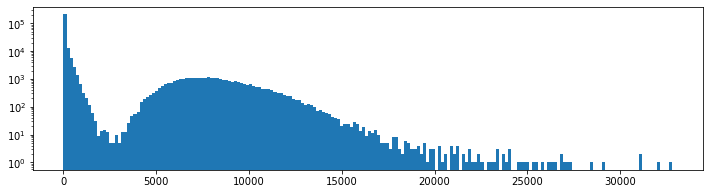

In [117]:
fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df.raw_value, bins=200)
ax.set_yscale('log')

In [9]:
df.start_year.value_counts()

2008.0    37633
2009.0    34590
2010.0    31600
2006.0    30550
2007.0    25181
2004.0    21912
2005.0    21901
2011.0    21800
2003.0    21539
2002.0     9298
2012.0     3270
1997.0     2935
1998.0     2930
2001.0     2921
2000.0     2919
1999.0     2919
Name: start_year, dtype: int64

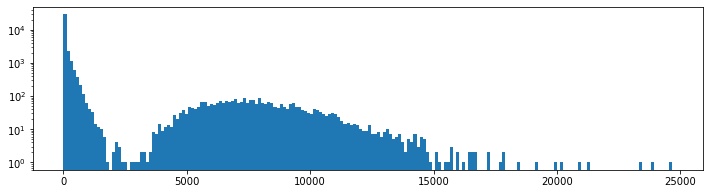

In [17]:
dfy = df[df.start_year == 2008]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

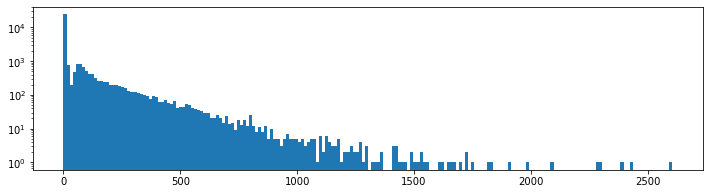

In [18]:
dfy = df[df.start_year == 2009]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

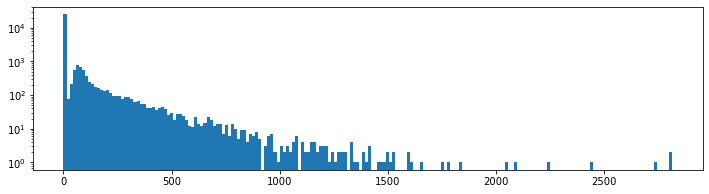

In [19]:
dfy = df[df.start_year == 2010]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

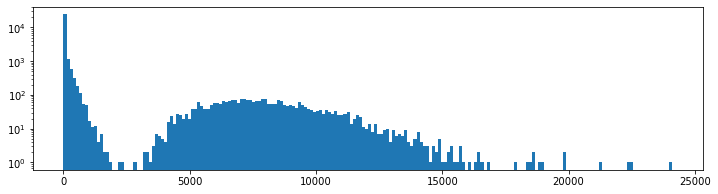

In [20]:
dfy = df[df.start_year == 2006]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

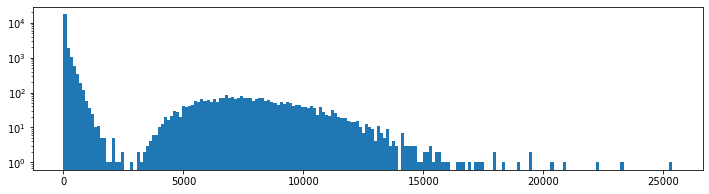

In [21]:
dfy = df[df.start_year == 2007]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

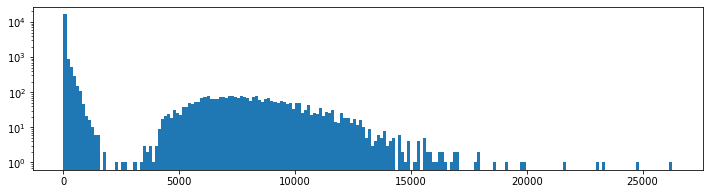

In [22]:
dfy = df[df.start_year == 2004]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

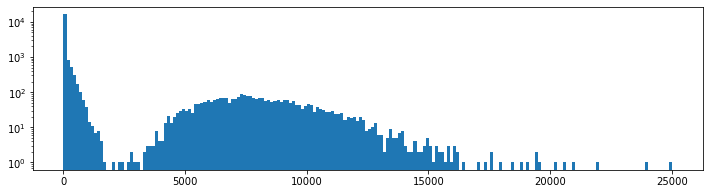

In [23]:
dfy = df[df.start_year == 2005]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

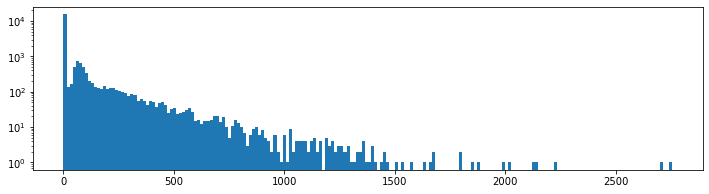

In [24]:
dfy = df[df.start_year == 2011]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

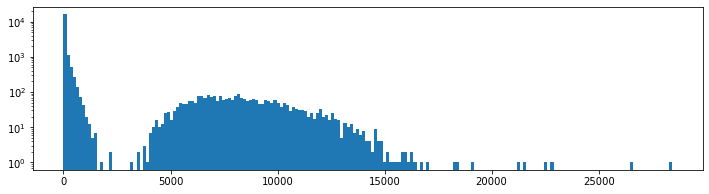

In [28]:
dfy = df[df.start_year == 2003]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

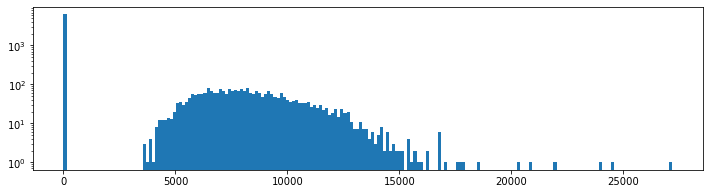

In [26]:
dfy = df[df.start_year == 2002]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

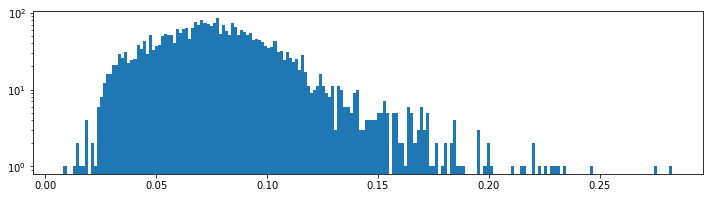

In [32]:
dfy = df[df.start_year == 2012]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

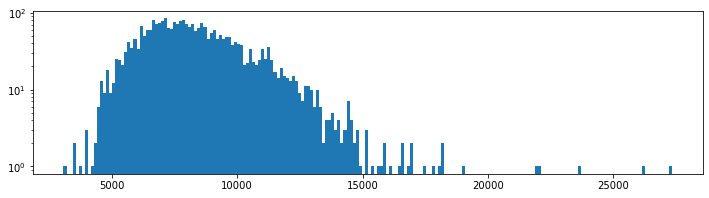

In [33]:
dfy = df[df.start_year == 1997]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

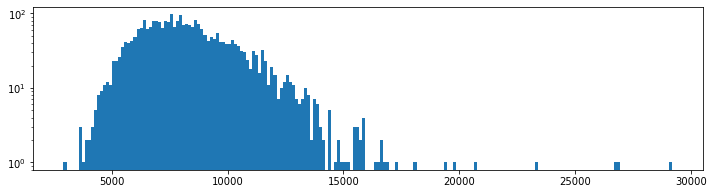

In [34]:
dfy = df[df.start_year == 1998]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

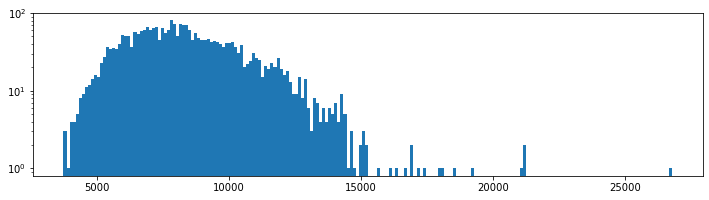

In [35]:
dfy = df[df.start_year == 2001]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

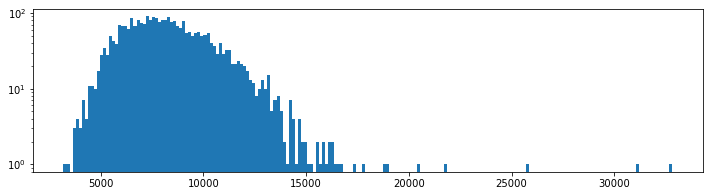

In [36]:
dfy = df[df.start_year == 2000]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

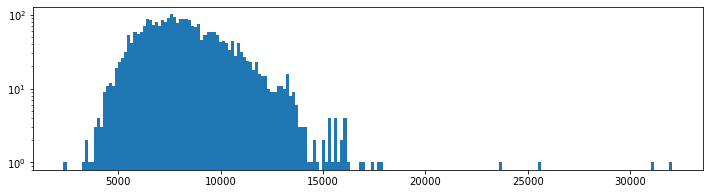

In [37]:
dfy = df[df.start_year == 1999]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(dfy.raw_value, bins=200)
ax.set_yscale('log')

The raw value column has very complex distribution.  When grouped by start-year, three distinct patterns emerge.  1. declining seen 2009, 2010 and 2011, 2. double peaks seen in 2008, 2006, 2007, 2004, 2005, 2003 and 2002, 3. one peak seen in 1997, 1998, 2001, 2000 and 1999.  Although 2012 also has only one peak, the raw_values are very different from other years since they are all less than 1.  Therefore, data will be analyzed in four groups.  

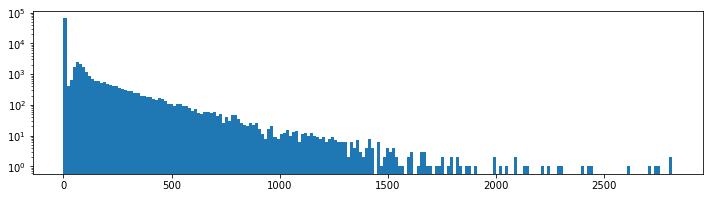

In [49]:
df1 = df[df['start_year'].isin([2009, 2010, 2011])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df1.raw_value, bins=200)
ax.set_yscale('log')

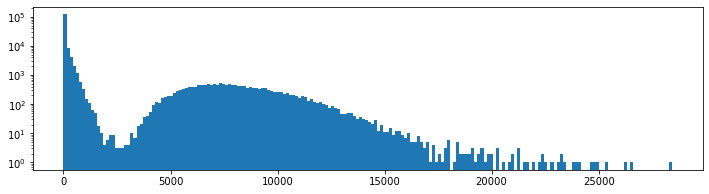

In [50]:
df2 = df[df['start_year'].isin([2008,2006,2007,2004,2005,2003])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df2.raw_value, bins=200)
ax.set_yscale('log')

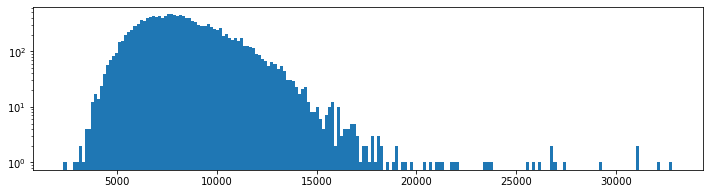

In [60]:
df3 = df[df['start_year'].isin([1997,1998,2001,2000,1999])]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df3.raw_value, bins=200)
ax.set_yscale('log')

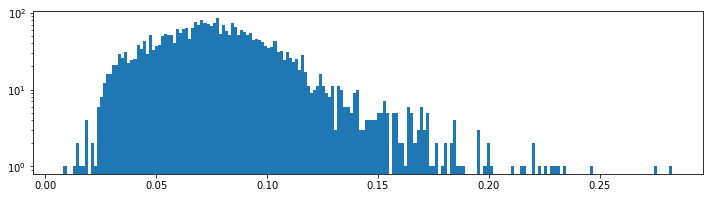

In [54]:
df4 = df[df['start_year']==2012]

fig = plt.figure(figsize=(12,3))
ax = fig.add_subplot(111)
plt.hist(df4.raw_value, bins=200)
ax.set_yscale('log')

### <b>Top five states with the higest raw_value in different groups

In [62]:
# top five states with the higest raw_value in group 1

df1.sort_values(by='raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
152920,AK,Nome Census Area,2.0,180.0,Sexually transmitted infections,45.0,267.0,9492.0,2812.9,2180.0,2010.0
152958,AK,Wade Hampton Census Area,2.0,270.0,Sexually transmitted infections,45.0,209.0,7459.0,2802.0,2270.0,2010.0
152931,AK,Northwest Arctic Borough,2.0,188.0,Sexually transmitted infections,45.0,213.0,7733.0,2754.4,2188.0,2011.0
152930,AK,Northwest Arctic Borough,2.0,188.0,Sexually transmitted infections,45.0,206.0,7523.0,2738.3,2188.0,2010.0
152959,AK,Wade Hampton Census Area,2.0,270.0,Sexually transmitted infections,45.0,207.0,7662.0,2701.6,2270.0,2011.0


In [63]:
# top five states with the higest raw_value in group 2

df2.sort_values(by='raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
27258,SD,Mellette County,46.0,95.0,Premature Death,1.0,54.0,NaN,28433.300,46095.0,2003.0
27335,SD,Shannon County,46.0,113.0,Premature Death,1.0,311.0,NaN,26489.600,46113.0,2003.0
27336,SD,Shannon County,46.0,113.0,Premature Death,1.0,307.0,NaN,26281.428,46113.0,2004.0
22931,ND,Sioux County,38.0,85.0,Premature Death,1.0,105.0,NaN,25367.021,38085.0,2007.0
22929,ND,Sioux County,38.0,85.0,Premature Death,1.0,91.0,NaN,25017.980,38085.0,2005.0


In [64]:
# top five states with the higest raw_value in group 3

df3.sort_values(by='raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
535,AK,Lake and Peninsula Borough,2.0,164.0,Premature Death,1.0,48.0,NaN,32810.4,2164.0,2000.0
26941,SD,Buffalo County,46.0,17.0,Premature Death,1.0,54.0,NaN,32053.9,46017.0,1999.0
534,AK,Lake and Peninsula Borough,2.0,164.0,Premature Death,1.0,46.0,NaN,31086.4,2164.0,1999.0
26942,SD,Buffalo County,46.0,17.0,Premature Death,1.0,50.0,NaN,31049.2,46017.0,2000.0
26940,SD,Buffalo County,46.0,17.0,Premature Death,1.0,52.0,NaN,29193.4,46017.0,1998.0


In [66]:
# top five states with the higest raw_value in group 4

df4.sort_values(by='raw_value', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
37951,CA,Imperial County,6.0,25.0,Unemployment,23.0,22132.0,78282.0,0.282721,6025.0,2012.0
36961,AZ,Yuma County,4.0,27.0,Unemployment,23.0,25277.0,92015.0,0.274705,4027.0,2012.0
70809,PR,Salinas Municipio,72.0,123.0,Unemployment,23.0,2061.0,8367.0,0.246325,72123.0,2012.0
70801,PR,Orocovis Municipio,72.0,107.0,Unemployment,23.0,1198.0,5120.0,0.233984,72107.0,2012.0
70747,PR,Adjuntas Municipio,72.0,1.0,Unemployment,23.0,1034.0,4466.0,0.231527,72001.0,2012.0


Sexually transmitted infections are found Alaska, 

### <b>Top five measures with the higest raw_value in different groups

In [68]:
# top five measures with the higest raw_value in group 1

df1.sort_values(by='measure_name', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
257226,TN,Shelby County,47.0,157.0,Violent crime rate,43.0,11742.333330,924734.66670,1269.805681,47157.0,2009.0
254638,OK,Adair County,40.0,1.0,Violent crime rate,43.0,76.000000,22546.00000,337.088619,40001.0,2009.0
254580,OH,Van Wert County,39.0,161.0,Violent crime rate,43.0,36.666667,28748.66667,127.542147,39161.0,2009.0
254587,OH,Vinton County,39.0,163.0,Violent crime rate,43.0,16.666667,13417.66667,124.214344,39163.0,2009.0
254593,OH,Warren County,39.0,165.0,Violent crime rate,43.0,154.666667,208683.33330,74.115486,39165.0,2009.0


In [69]:
# # top five measures with the higest raw_value in group 2

df2.sort_values(by='measure_name', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
251382,MT,Musselshell County,30.0,65.0,Violent crime rate,43.0,19.000000,4533.50000,419.102239,30065.0,2003.0
255671,PA,Juniata County,42.0,67.0,Violent crime rate,43.0,20.666667,23216.66667,89.016511,42067.0,2006.0
255664,PA,Jefferson County,42.0,65.0,Violent crime rate,43.0,78.000000,41713.33333,186.990571,42065.0,2006.0
255665,PA,Jefferson County,42.0,65.0,Violent crime rate,43.0,93.000000,41800.33333,222.486264,42065.0,2007.0
255666,PA,Jefferson County,42.0,65.0,Violent crime rate,43.0,97.000000,42344.00000,229.076138,42065.0,2008.0


In [70]:
# top five measures with the higest raw_value in group 3

df3.sort_values(by='measure_name', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
5,AL,Henry County,1.0,67.0,Premature Death,1.0,251.0,NaN,10920.2,1067.0,1997.0
24012,OH,Warren County,39.0,165.0,Premature Death,1.0,1371.0,NaN,6093.7,39165.0,1997.0
24014,OH,Warren County,39.0,165.0,Premature Death,1.0,1469.0,NaN,5777.2,39165.0,1999.0
24015,OH,Warren County,39.0,165.0,Premature Death,1.0,1466.0,NaN,5534.9,39165.0,2000.0
24016,OH,Warren County,39.0,165.0,Premature Death,1.0,1494.0,NaN,5618.1,39165.0,2001.0


In [71]:
# top five measures with the higest raw_value in group 4

df4.sort_values(by='measure_name', ascending=False).head()

,state,county,state_code,county_code,measure_name,measure_id,numerator,denominator,raw_value,fips_code,start_year
35738,AL,Alabama,1.0,0.0,Unemployment,23.0,157119.0,2156304.0,0.072865,1000.0,2012.0
59716,OK,Dewey County,40.0,43.0,Unemployment,23.0,76.0,2903.0,0.026180,40043.0,2012.0
59606,OK,Choctaw County,40.0,23.0,Unemployment,23.0,468.0,7038.0,0.066496,40023.0,2012.0
59617,OK,Cimarron County,40.0,25.0,Unemployment,23.0,41.0,1139.0,0.035996,40025.0,2012.0
59628,OK,Cleveland County,40.0,27.0,Unemployment,23.0,5653.0,128843.0,0.043875,40027.0,2012.0
